**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The Telco Customer Dataset](https://www.kaggle.com/datasets/dhrubangtalukdar/telco-customer-churn-data/data)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

/kaggle/input/telco-customer-churn-data/synthetic_customer_churn_100k.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('synthetic_customer_churn_100k.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,Contract,PaymentMethod,TotalCharges,Churn
0,1,56,Female,68,147.58,Two year,Bank transfer,10052.03,No
1,2,69,Male,32,22.54,Month-to-month,Mailed check,686.78,No
2,3,46,Female,10,52.47,One year,Electronic check,537.88,No
3,4,32,Male,22,109.67,Month-to-month,Mailed check,2390.04,Yes
4,5,60,Female,54,130.98,Month-to-month,Credit card,7081.28,No


## last Five row

In [4]:
df.tail()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,Contract,PaymentMethod,TotalCharges,Churn
99995,99996,31,Male,49,26.07,Month-to-month,Electronic check,1220.50,No
99996,99997,64,Female,44,123.22,Month-to-month,Mailed check,5384.38,No
99997,99998,48,Other,32,75.37,Month-to-month,Credit card,2372.33,Yes
99998,99999,42,Female,60,114.00,Month-to-month,Mailed check,6826.55,No
99999,100000,72,Male,57,66.76,One year,Credit card,3828.60,No


## Shape of our dataset

In [5]:
df.shape

(100000, 9)

## List out all columns

In [6]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges', 'Contract',
       'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

CustomerID          int64
Age                 int64
Gender             object
Tenure              int64
MonthlyCharges    float64
Contract           object
PaymentMethod      object
TotalCharges      float64
Churn              object
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   CustomerID      100000 non-null  int64  
 1   Age             100000 non-null  int64  
 2   Gender          100000 non-null  object 
 3   Tenure          100000 non-null  int64  
 4   MonthlyCharges  100000 non-null  float64
 5   Contract        100000 non-null  object 
 6   PaymentMethod   100000 non-null  object 
 7   TotalCharges    100000 non-null  float64
 8   Churn           100000 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 6.9+ MB


## Check Null Value

In [9]:
df.isnull().sum()

CustomerID        0
Age               0
Gender            0
Tenure            0
MonthlyCharges    0
Contract          0
PaymentMethod     0
TotalCharges      0
Churn             0
dtype: int64

## Check Dupicate Value

In [10]:
df.duplicated().sum()

np.int64(0)

## Summary

In [11]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,49.027240,36.527090,79.974933,2926.140256
std,28867.657797,18.177862,20.789552,40.491961,2388.163672
min,1.000000,18.000000,1.000000,10.000000,-118.430000
25%,25000.750000,33.000000,18.000000,44.720000,963.667500
50%,50000.500000,49.000000,37.000000,80.000000,2268.060000
75%,75000.250000,65.000000,54.000000,115.050000,4394.327500
max,100000.000000,80.000000,72.000000,150.000000,10831.460000


# EDA

In [12]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

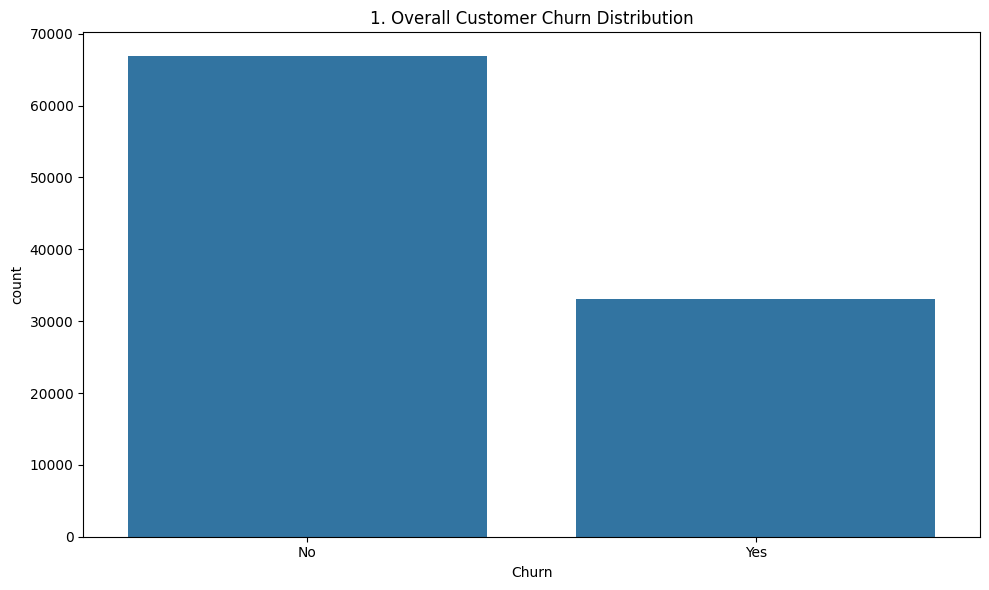

In [13]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Churn')
plt.title(f'{plot_no}. Overall Customer Churn Distribution')
show_fig()
plot_no += 1

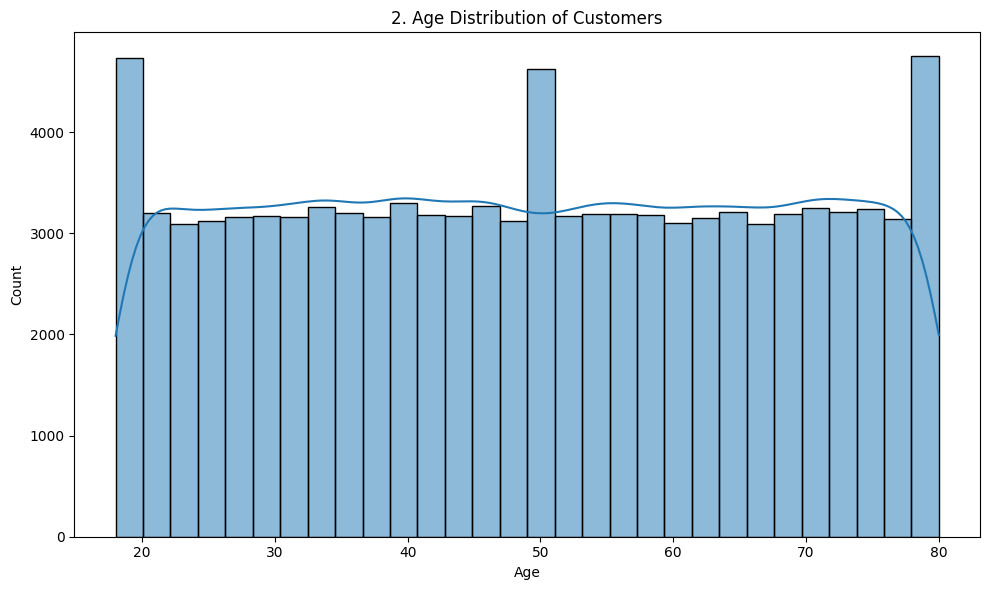

In [14]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title(f'{plot_no}. Age Distribution of Customers')
show_fig()
plot_no += 1


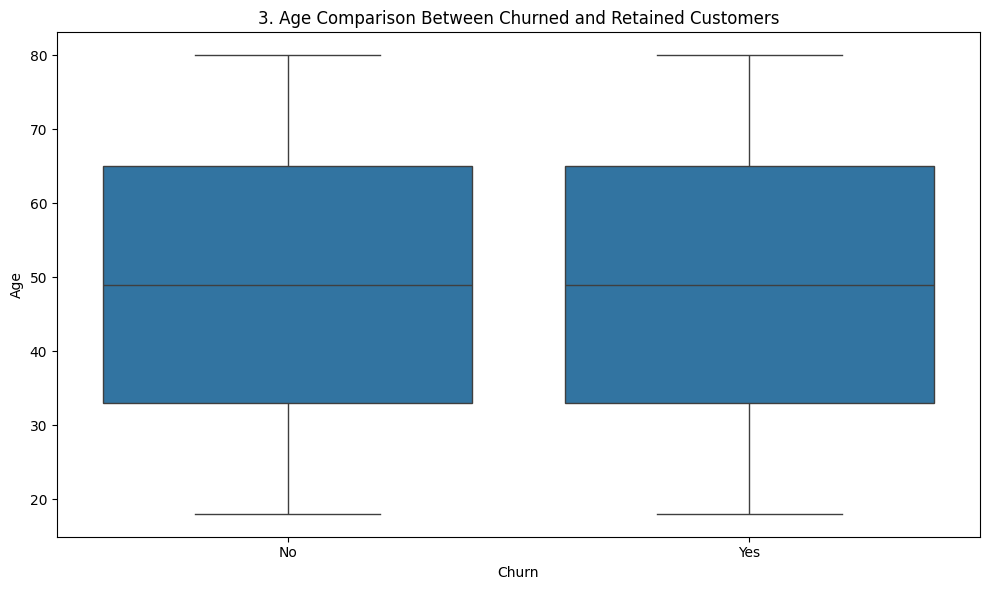

In [15]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Churn', y='Age')
plt.title(f'{plot_no}. Age Comparison Between Churned and Retained Customers')
show_fig()
plot_no += 1


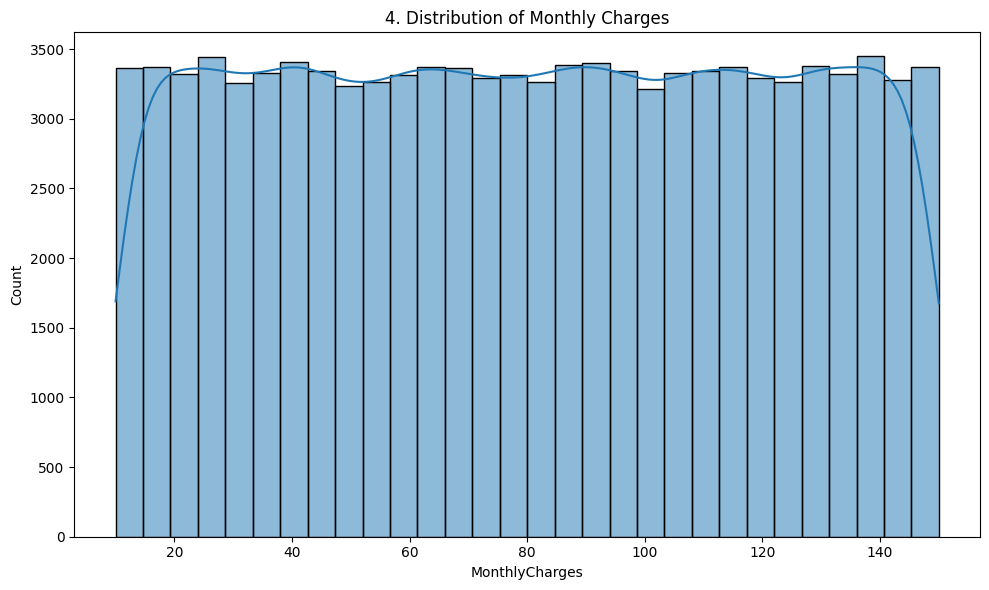

In [16]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title(f'{plot_no}. Distribution of Monthly Charges')
show_fig()
plot_no += 1


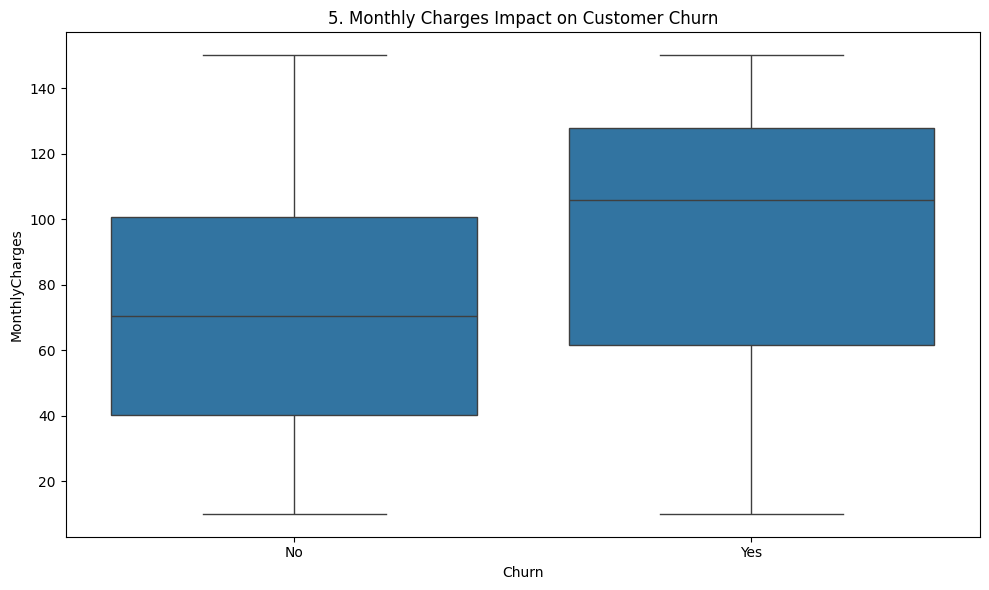

In [17]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title(f'{plot_no}. Monthly Charges Impact on Customer Churn')
show_fig()
plot_no += 1


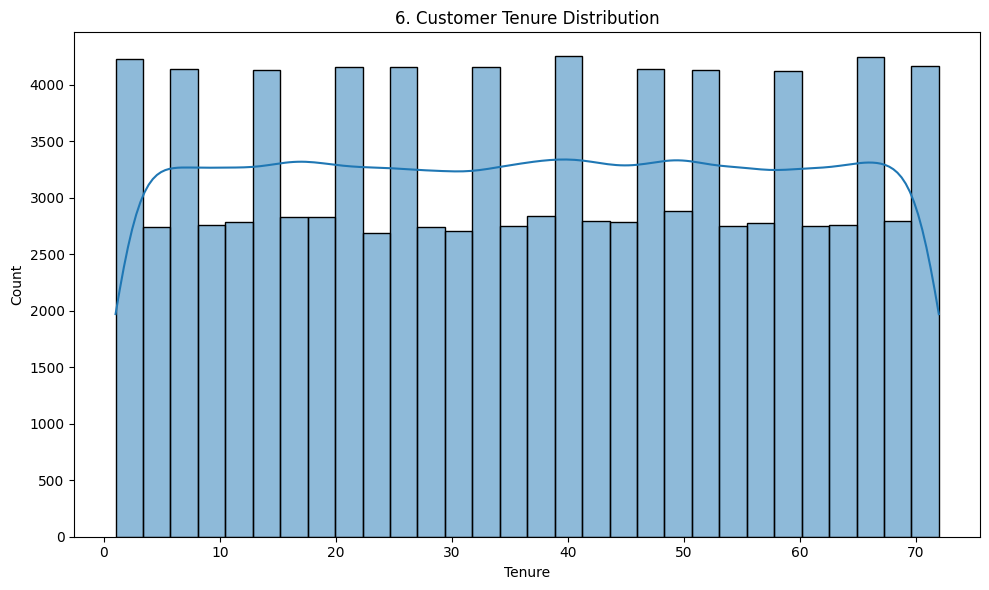

In [18]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['Tenure'], bins=30, kde=True)
plt.title(f'{plot_no}. Customer Tenure Distribution')
show_fig()
plot_no += 1


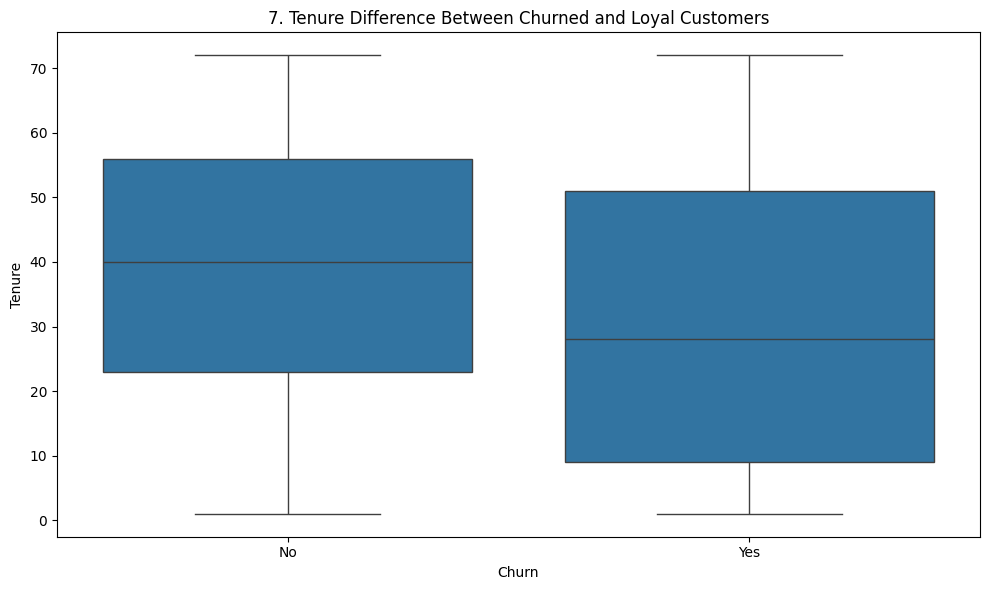

In [19]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Churn', y='Tenure')
plt.title(f'{plot_no}. Tenure Difference Between Churned and Loyal Customers')
show_fig()
plot_no += 1


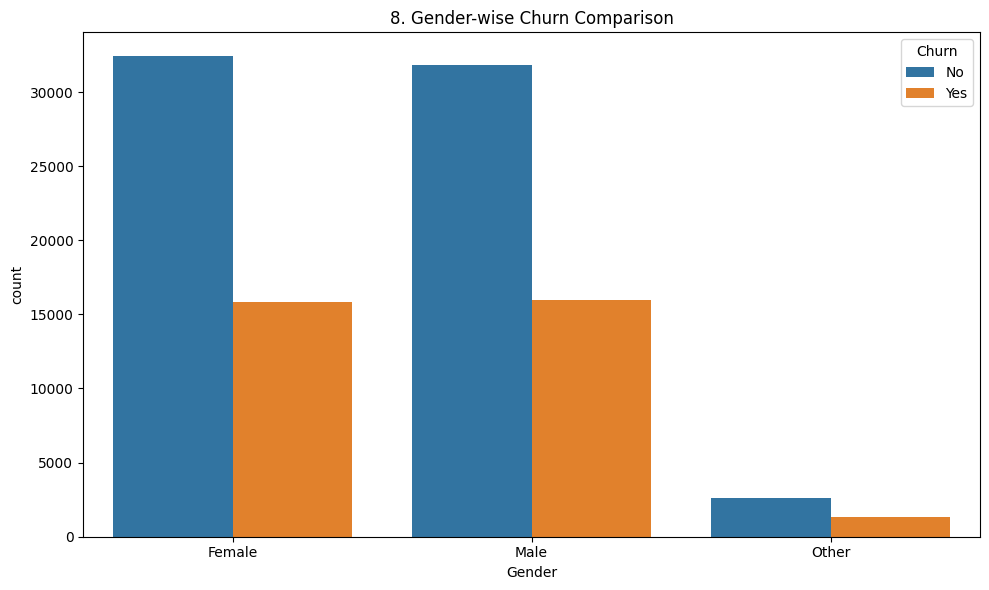

In [20]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Gender', hue='Churn')
plt.title(f'{plot_no}. Gender-wise Churn Comparison')
show_fig()
plot_no += 1


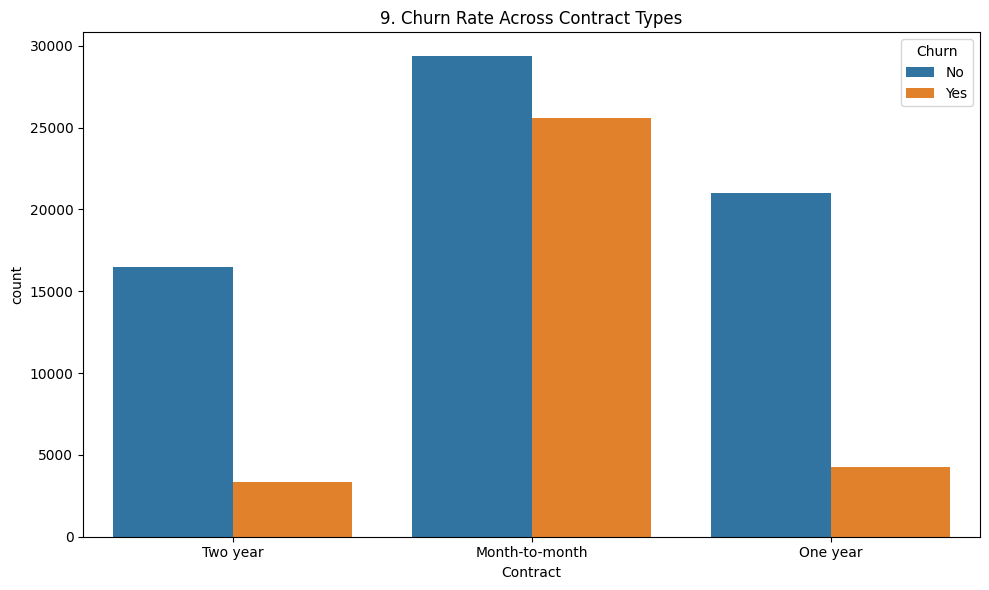

In [21]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title(f'{plot_no}. Churn Rate Across Contract Types')
show_fig()
plot_no += 1


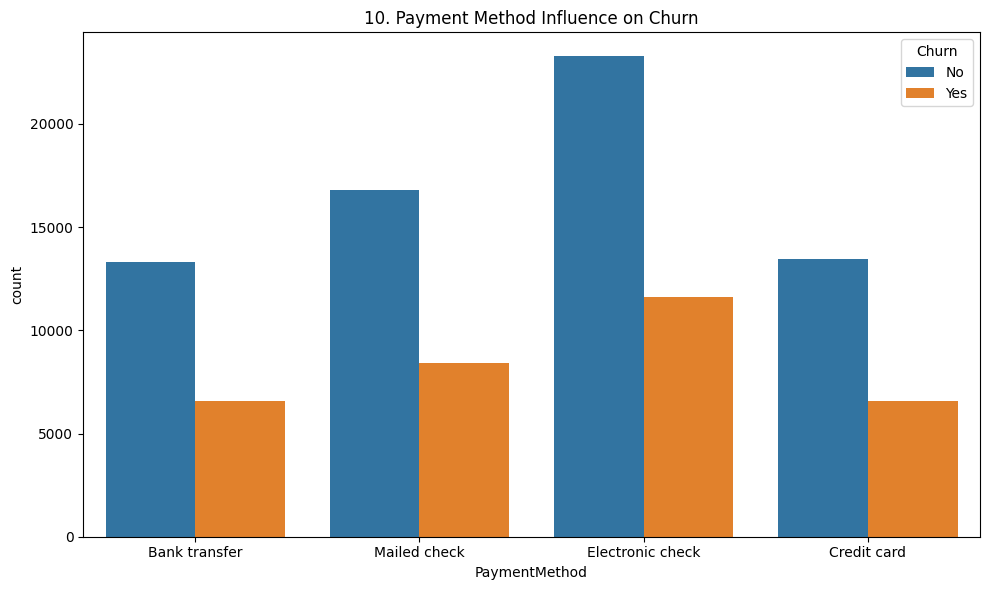

In [22]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title(f'{plot_no}. Payment Method Influence on Churn')
show_fig()
plot_no += 1


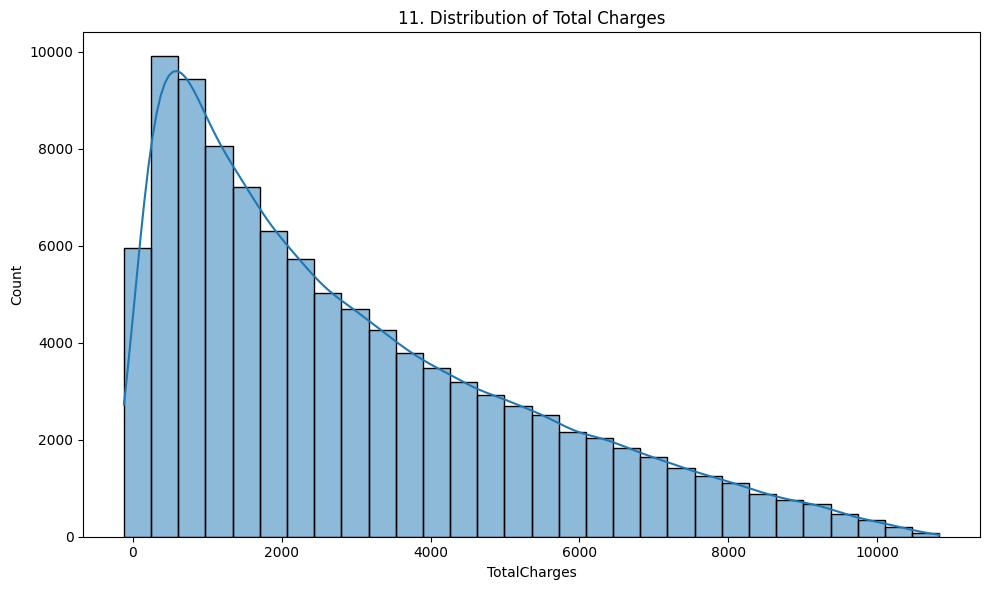

In [23]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['TotalCharges'], bins=30, kde=True)
plt.title(f'{plot_no}. Distribution of Total Charges')
show_fig()
plot_no += 1


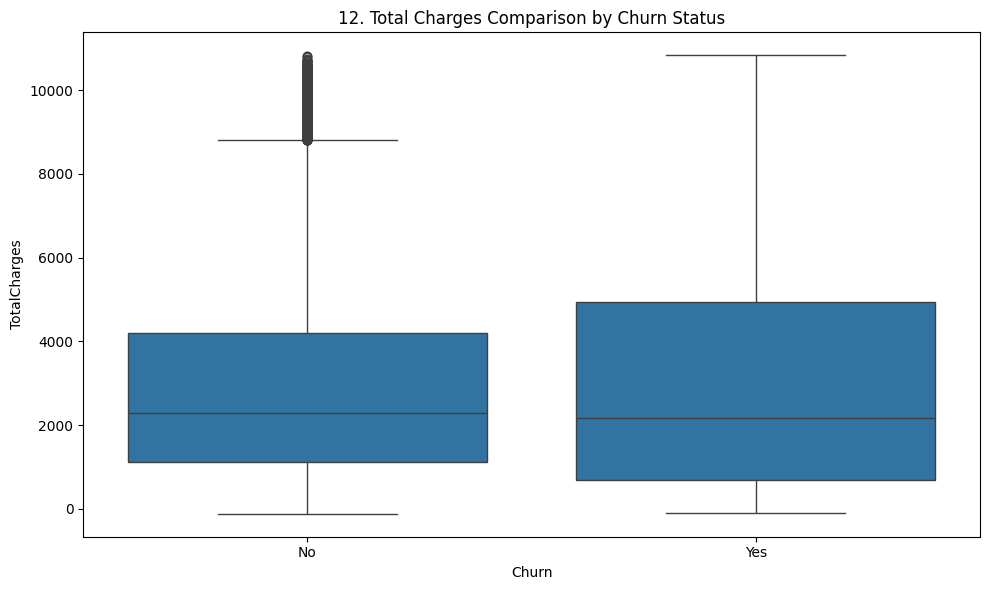

In [24]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title(f'{plot_no}. Total Charges Comparison by Churn Status')
show_fig()
plot_no += 1


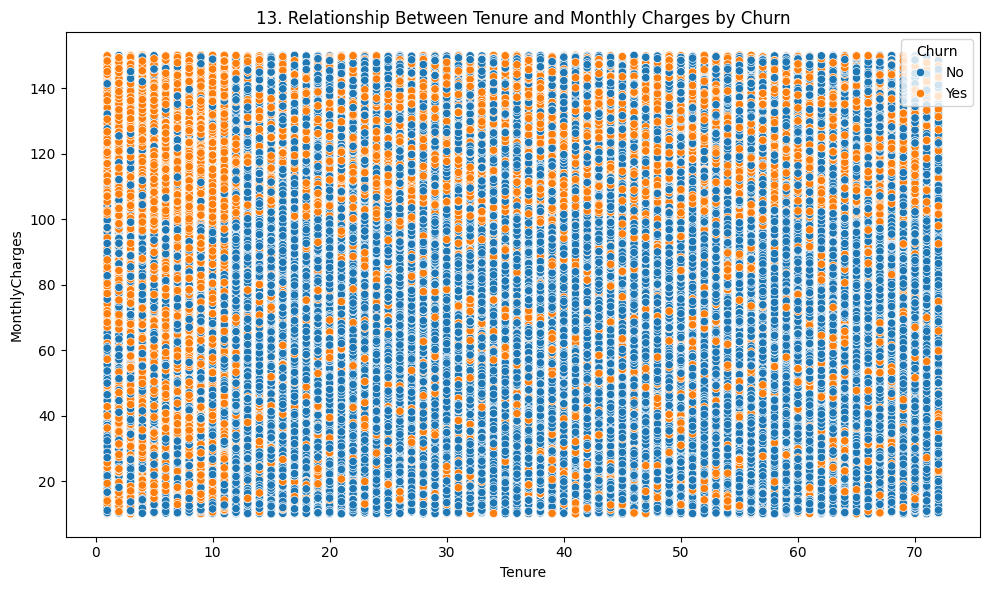

In [25]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Tenure', y='MonthlyCharges', hue='Churn')
plt.title(f'{plot_no}. Relationship Between Tenure and Monthly Charges by Churn')
show_fig()
plot_no += 1


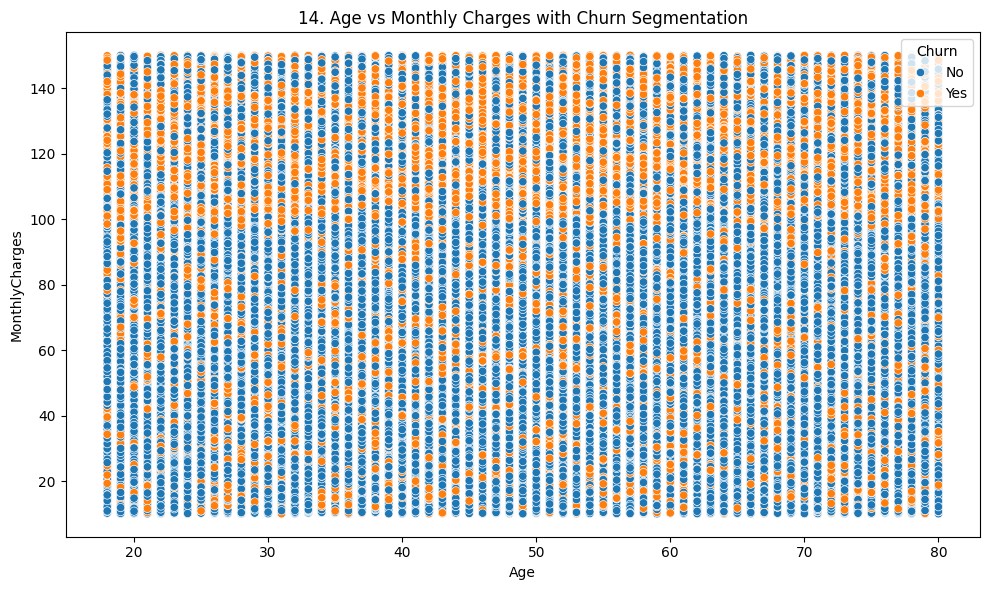

In [26]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='MonthlyCharges', hue='Churn')
plt.title(f'{plot_no}. Age vs Monthly Charges with Churn Segmentation')
show_fig()
plot_no += 1


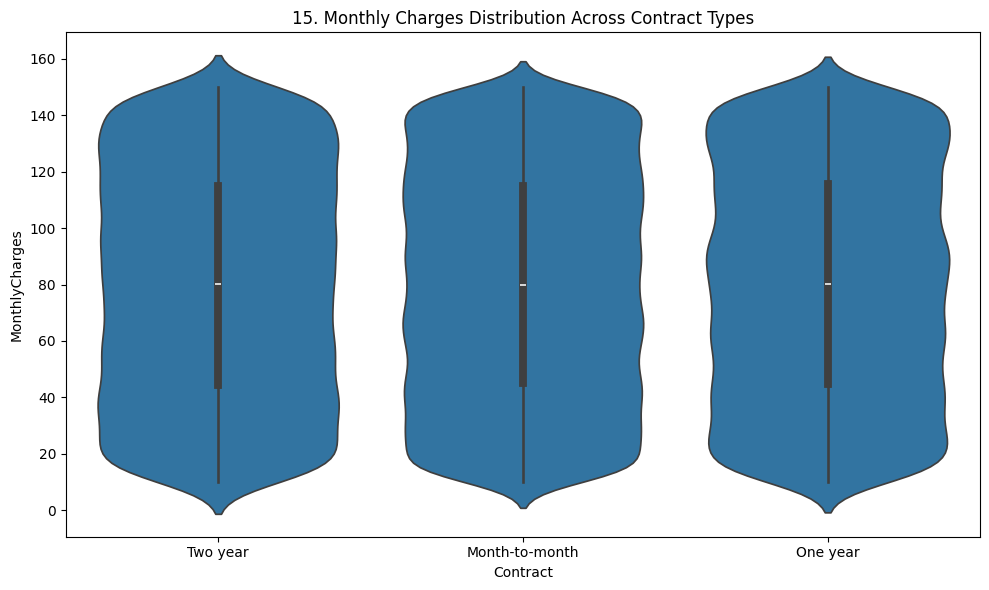

In [27]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Contract', y='MonthlyCharges')
plt.title(f'{plot_no}. Monthly Charges Distribution Across Contract Types')
show_fig()
plot_no += 1


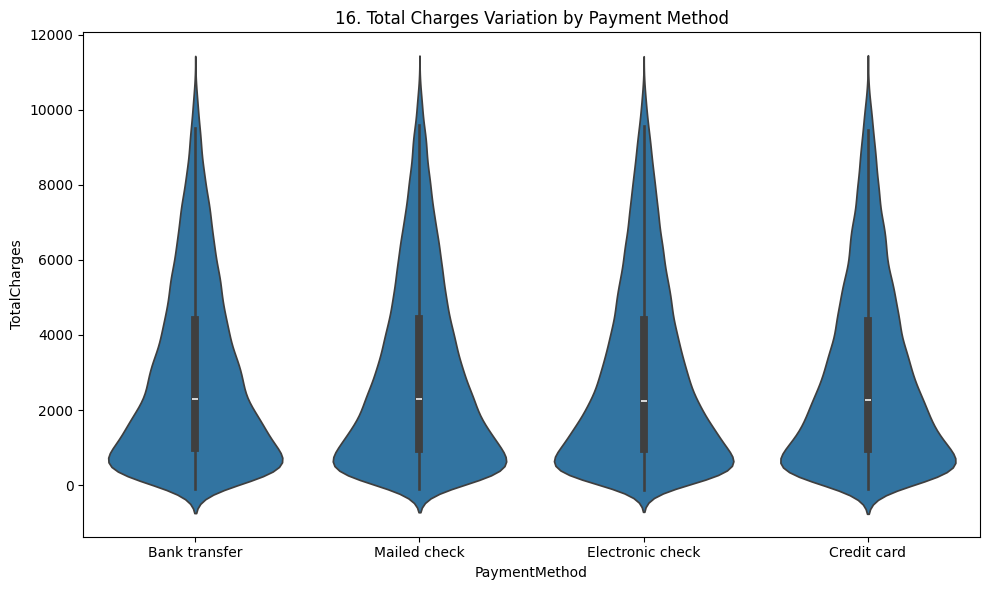

In [28]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='PaymentMethod', y='TotalCharges')
plt.title(f'{plot_no}. Total Charges Variation by Payment Method')
show_fig()
plot_no += 1


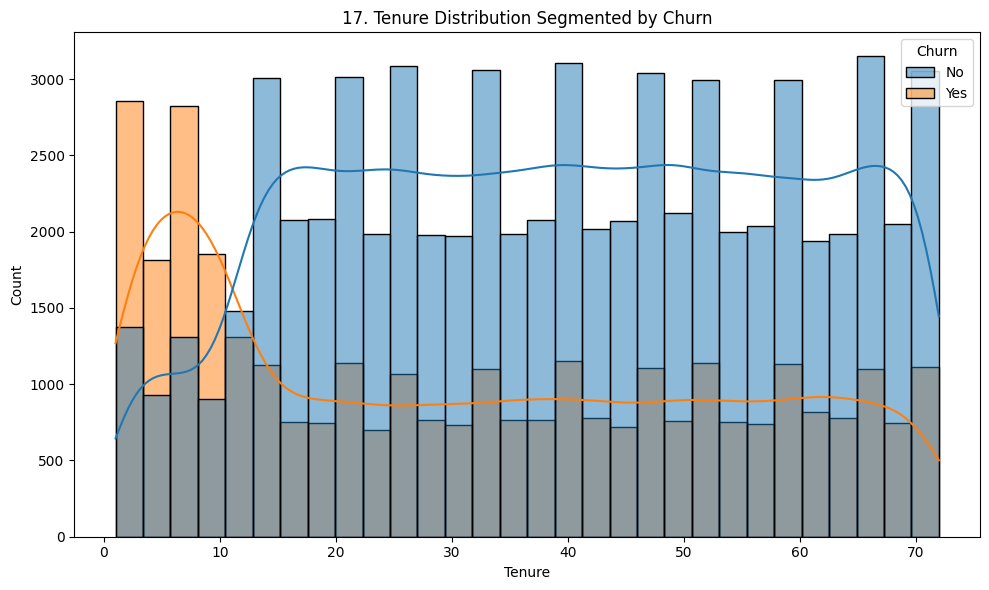

In [29]:
fig = plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Tenure', hue='Churn', bins=30, kde=True)
plt.title(f'{plot_no}. Tenure Distribution Segmented by Churn')
show_fig()
plot_no += 1


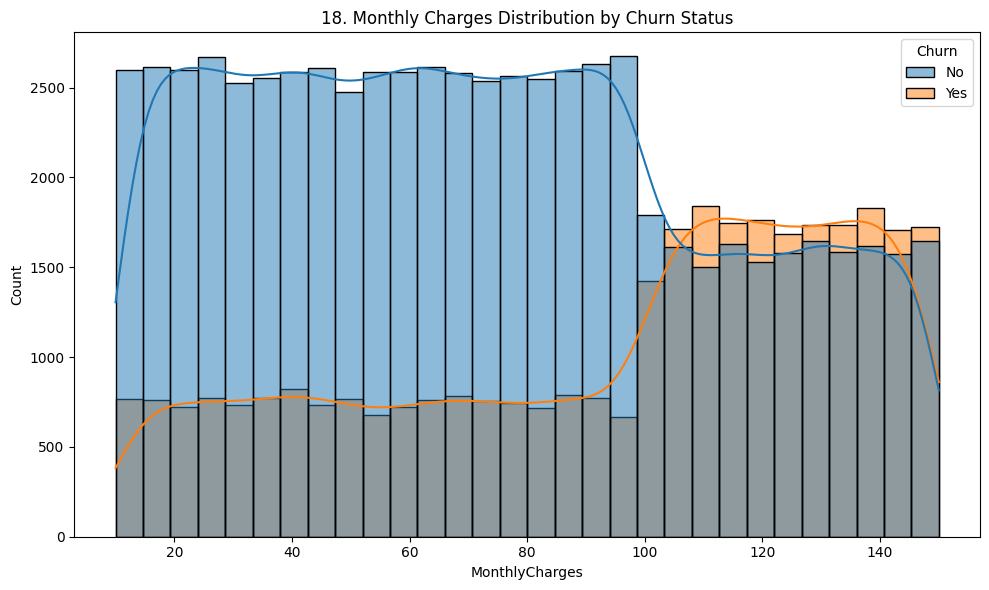

In [30]:
fig = plt.figure(figsize=(10,6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, kde=True)
plt.title(f'{plot_no}. Monthly Charges Distribution by Churn Status')
show_fig()
plot_no += 1


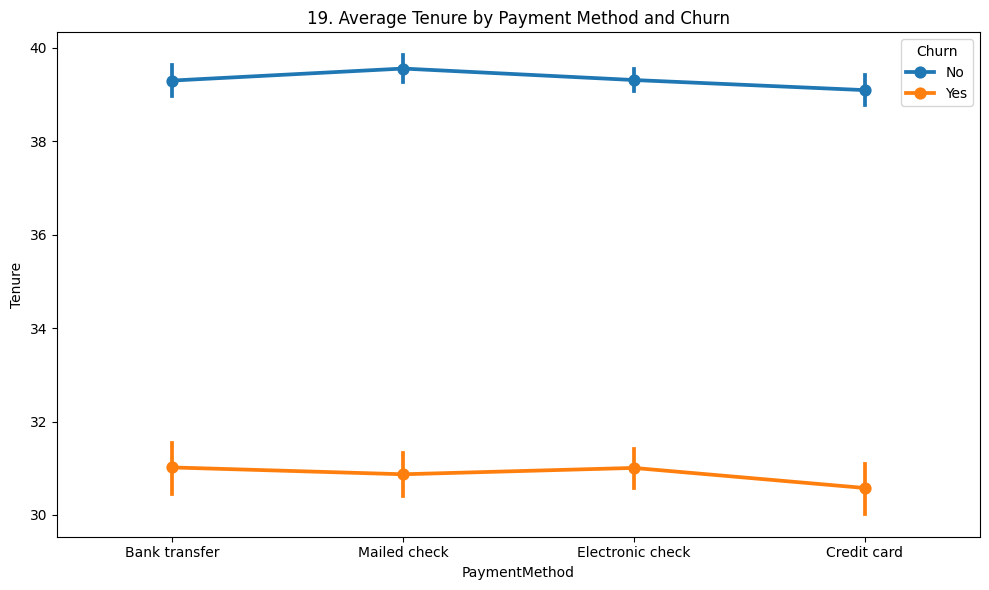

In [31]:
fig = plt.figure(figsize=(10,6))
sns.pointplot(data=df, x='PaymentMethod', y='Tenure', hue='Churn')
plt.title(f'{plot_no}. Average Tenure by Payment Method and Churn')
show_fig()
plot_no += 1


# Model Training

## Create a copy of dataset to avoid modifying original df

In [32]:
data = df.copy()

## Encode categorical variables

In [33]:
le = LabelEncoder()
categorical_cols = ['Gender', 'Contract', 'PaymentMethod', 'Churn']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

## Define features and target variable

In [34]:
X = data.drop(['CustomerID', 'Churn'], axis=1)
y = data['Churn']

## Split dataset into training and testing sets

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Apply feature scaling

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Logistic Regression model

In [37]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

## Generate predictions

In [38]:
y_pred = model.predict(X_test_scaled)

## Calculate and print accuracy score

In [39]:
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 72.4050


## Plot confusion matrix

<Figure size 800x600 with 0 Axes>

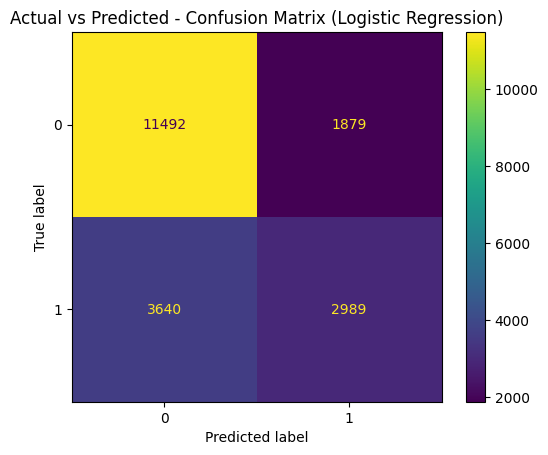

In [40]:
fig = plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Actual vs Predicted - Confusion Matrix (Logistic Regression)")
plt.show()
